In [5]:
#tutti gli import
!pip install geopandas
import geopandas
!pip install contextily
import contextily as ctx

     |████████████████████████████████| 1.0 MB 23.8 MB/s 
     |████████████████████████████████| 15.4 MB 57.7 MB/s 
     |████████████████████████████████| 6.3 MB 52.2 MB/s 
     |████████████████████████████████| 19.3 MB 1.1 MB/s 


In [6]:
#montare il drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
#caricamento geodataframe
parchi = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Parchi_regionali_e_nazionali_polygon")
comuni =  geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/Com01012021_g")
quartieri = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/ds964_nil_wm.zip")
corsi_acqua = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Corsi_acqua_Piano_di_Gestione")
province =  geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/Limiti01012021_g/Limiti01012021_g/ProvCM01012021_g")
pisteciclabili = geopandas.read_file("/content/drive/MyDrive/Colab Notebooks/bike_ciclabili.zip")


/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:82: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  if is_color_like(value):


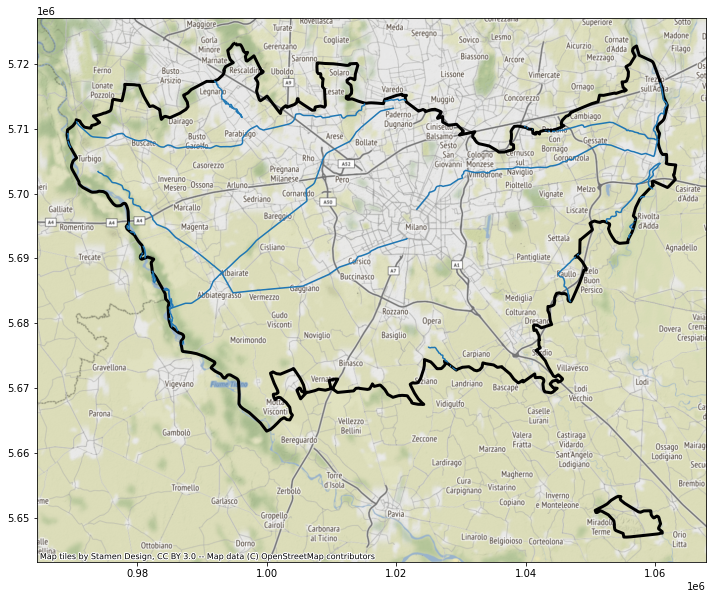

In [8]:
#visualizzi su una mappa i 10 corsi d'acqua più lunghi della provincia di Milano
milano = province[province["DEN_UTS"]== "Milano"]
corsimilano = corsi_acqua[corsi_acqua.intersects(milano.unary_union)]
corsipiulunghi = corsimilano.sort_values(by =  "SHAPE_LEN",ascending = False).head(10)

ax = corsipiulunghi.to_crs(epsg = 3857).plot(figsize=(20,10))
milano.to_crs(epsg = 3857).plot(ax = ax, figsize=(20,10),facecolor = "None",edgecolor = "K",linewidth = 3)
ctx.add_basemap(ax)

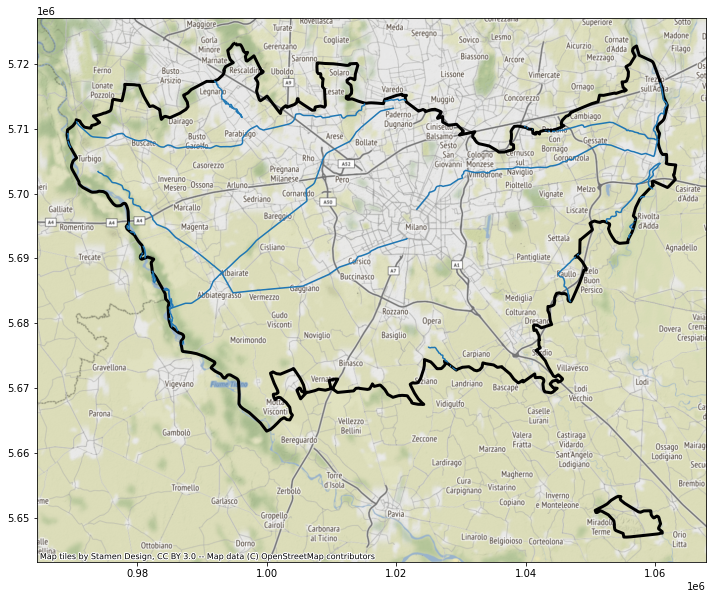

In [9]:
#caricare la mappa
ax = corsipiulunghi.to_crs(epsg = 3857).plot(figsize=(20,10))
milano.to_crs(epsg = 3857).plot(ax = ax,figsize=(20,10),facecolor = "None",edgecolor = "K",linewidth = 3)
ctx.add_basemap(ax)

In [10]:
#tutte le possibili diciture dentro il plot:
milano.plot(ax = ax ,figsize=(20,10),facecolor = "None",edgecolor = "K",linewidth = 3,alpha = 0.6)

/usr/local/lib/python3.7/dist-packages/geopandas/plotting.py:175: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  [_PolygonPatch(poly) for poly in geoms if not poly.is_empty], **kwargs


<Figure size 432x288 with 0 Axes>

In [ ]:
#dato un comune, avere i parchi che ospita (elenco e mappa)
comune = input("Inserisci il nome del comune: ")
mappa_comune = comuni[comuni.COMUNE == comune]
parchi_comune = parchi[parchi.intersects(mappa_comune.geometry.squeeze())]
parchi_comune

In [ ]:
#mappa:
ax = mappa_comune.to_crs(epsg=3857).plot(figsize=(20,10), edgecolor = "k", facecolor = "none", linewidth = 3)
parchi_comune.to_crs(epsg=3857).plot(ax = ax, alpha = 0.6, facecolor = "green")
ctx.add_basemap(ax)

In [ ]:
#tutti gli intersects geometry squeeze unary union
parchi_comune = parchi[parchi.intersects(mappa_comune.geometry.squeeze())]
pisteaffori = pisteciclabili[pisteciclabili.intersects(quartiereaffori.unary_union)]

In [ ]:
#GUARDARE GEOPANDAS 5 per il quartiere meno esteso, piu esteso e per visualizzarli entrambi col colore indicato
https://github.com/Sebacili/Python_appunti_ed_esercizi/blob/main/Geopandas/CilibeanuGeopandas5_esercizio2%20(1).ipynb

In [ ]:
# visualizzare su una mappa il quartiere di Affori e le piste ciclabili che lo attraversano
# evidenziare bene in rosso le piste ciclabili come nell'esempio sotto
 ax = quartiereaffori.to_crs(epsg = 3857).plot(figsize=(30,15),linewidth = 3, alpha = 0.5,facecolor = "None" )
pisteaffori.to_crs(epsg = 3857).plot(ax=ax, figsize=(30,15),linewidth = 5,edgecolor = "r" )
ctx.add_basemap(ax)

In [ ]:
#PUNTO TOUCHES; comuni limitrofi, comuni confinanti , comune piu esteso, comune meno esteso e tutti gli if
https://github.com/Alex00114/Python_appunti_ed_esercizi/blob/main/GeoPandas/tag_es6.ipynb
https://github.com/Sebacili/Python_appunti_ed_esercizi/blob/main/Geopandas/CilibeanuEsercizioGeopandas6%20(1).ipynb